## Группа DS03-onl

Студент Парфимович Алексей

## Домашнее задание №8

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
1. Нормализовать данные (Скалировать данные в диаппазоне от -1 до 1).
2. Обработать пропуски и выбросы.
3. Построить матрицу корреляции.
4. Построить гистограммы распределения.
5. Выполнить поиск взаимозависимых данных. // Описать анализ матрицы корреляции
6. Выполнить тест на нормальность. // критерии проверки на нормальность
7. Написать вывод по полученным результатам 
  

### Загрузка набора даных из файла
Загружаем данные из excel файла в pandas dataframe

In [1]:
import pandas as pd

XLS_DATA_PATH = 'Real estate valuation data set.xlsx'

X1='X1 transaction date'
X2='X2 house age'
X3='X3 distance to the nearest MRT station'
X4='X4 number of convenience stores'
X5='X5 latitude'
X6='X6 longitude'
Y ='Y house price of unit area' 

def load_xls_data(data_path):
    return pd.read_excel(data_path)

df = load_xls_data(XLS_DATA_PATH)

df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Очистка данных

#### Обработка пропусков данных

1. Построение карты пропущенных значений

C:\Windows\Temp\ipykernel_17080\35984409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[X1,X2,X3,X4,X5,X6,Y]].replace('', np.nan, inplace=True)


<AxesSubplot:>

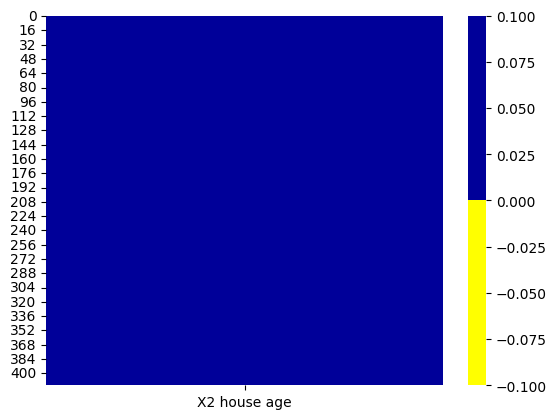

In [2]:
from multiprocessing.sharedctypes import Value
import numpy as np

# Удалить все пробелы из строк
df.replace(r'\s+', '', regex=True, inplace=True)

# Заменить пустые строки на NaN
df[[X1,X2,X3,X4,X5,X6,Y]].replace('', np.nan, inplace=True)


import matplotlib.pyplot as plt
import seaborn as sn

# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#ffff00', '#000099']

sn.heatmap(df[[X2]].isnull(), cmap=sn.color_palette(colours))

2. Составление списка признаков c долями отсутствующих записей в процентах 

In [3]:
import numpy as np

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

No - 0%
X1 transaction date - 0%
X2 house age - 0%
X3 distance to the nearest MRT station - 0%
X4 number of convenience stores - 0%
X5 latitude - 0%
X6 longitude - 0%
Y house price of unit area - 0%


В результате выполненных проверок в наборе данных не обнаружено пропущенных значений

#### Обнаружение выбросов (Нетипичных данных)

1. Анализ описательной статистики набора данных - значений квартилей 25, 50, 75% и минимальных-максимальных значений признаков

In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Из описательной статистики видно, что в X2 максимальное значение существенно превышает значение квартиля 75%

2. Построение коробчатой диаграммы признаков

(принято считать что любые точки данных ниже или выше границ диаграммы рассматриваются как выбросы.)

<AxesSubplot:>

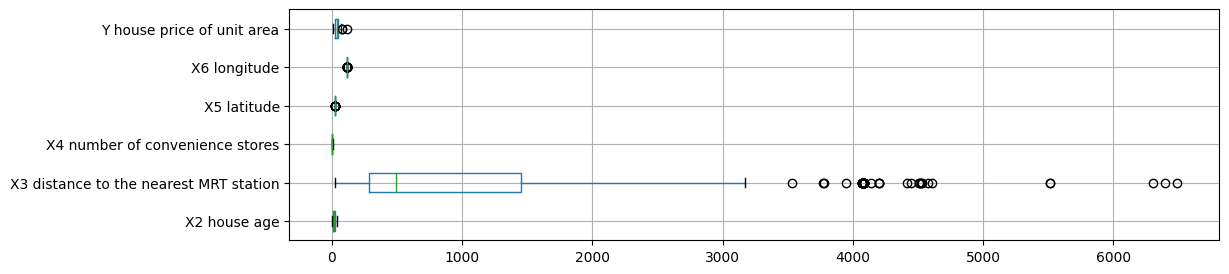

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))

df.boxplot(column=[X2,X3,X4,X5,X6,Y], vert=0 ) #, notch=True, patch_artist=True)

В результате проверок можно увидеть выбросы значения для X3, X5, X6, Y 

### Удаление выбросов данных

1. Выделение выбросов используя межквартильный диапазон IQR = Q3(квартиль 75%) - Q1(квартиль 25

In [6]:
import scipy.stats as stats

# Размерность исходного набора данных
print(f'Размерность исходного наборы данных : {df.shape}')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR= df.apply(stats.iqr)

df_clean1=df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

# Размерность очищенного набора данных (метод межквартельного интревала)
print(f'Размерность очищенного набора данных (метод межквартельного интервала) : {df_clean1.shape}')

Размерность исходного наборы данных : (414, 8)
Размерность очищенного набора данных (метод межквартельного интервала) : (371, 8)


2. Выделение выбросов используя метод Z-оценки  
Мы можем определить наблюдение как выброс, если его z-оценка меньше -3 или больше 3

In [7]:
import numpy as np

z = np.abs(stats.zscore(df))

df_clean2 = df[(z<3).all(axis=1)]
 
# Размерность очищенного набора данных (метод Z-оценки)
print(f'Размерность очищенного набора данных (метод Z-оценки) : {df_clean2.shape}')

Размерность очищенного набора данных (метод Z-оценки) : (407, 8)


Вывод:  
Метод z-оценки идентифицировал и удалил 7 наблюдений как выбросы, в то время как метод межквартильного интервала идентифицировал и удалил 43 наблюдения как выбросы.

In [8]:
df = df_clean1

df.shape

(371, 8)

### Отбор неинформативных признаков

1. Составим список признаков, у которых более 95% строк содержат одно и то же значение  
(такие признаки отсутсвуют)

In [9]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

В наборе отсутствуют признаки удовлетворяющие условиям

### Поиск дубликатов записей

Вычислим дубликаты по набору ключевых признаков.  
Например, проверим уникальность записей по признакам X1, X2, X3, X4, X5, X6.

In [10]:
df.fillna(-999).groupby([X1, X2, X3, X4, X5, X6])[X1].count().sort_values(ascending=False).head(21)

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  X5 latitude  X6 longitude
2013.583333          6.6           90.45606                                9                                24.97433     121.54310       2
2013.416667          14.7          1717.19300                              2                                24.96447     121.51649       2
2013.000000          18.0          1414.83700                              1                                24.95182     121.54887       2
2012.750000          0.0           208.39050                               6                                24.95618     121.53844       2
2013.250000          9.1           1402.01600                              0                                24.98569     121.52760       2
2013.500000          13.6          492.23130                               5                                24.96515     121.53737       2
2013.250000          3.8        

Выводы: В наборе найдены полность идентичные записи отличающиеся только ценой за дом!  

Выполним удаление записей-дубликатов с большей ценой:

In [11]:
# Удаление дубликатов

df = df.sort_values(by=Y).drop_duplicates([X1, X2, X3, X4, X5, X6], keep='first')

df.shape

(353, 8)

### Проверка исходных данных на нормальность

#### Проверка распределения исходных данных с помощью гистограмм

array([[<AxesSubplot:title={'center':'Y house price of unit area'}>]],
      dtype=object)

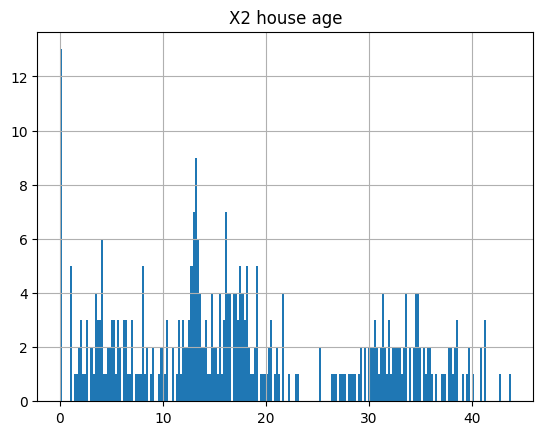

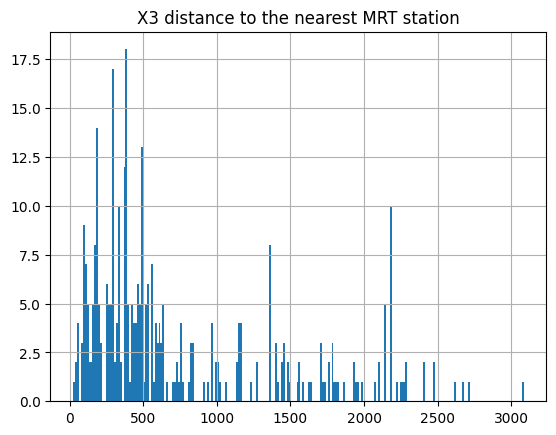

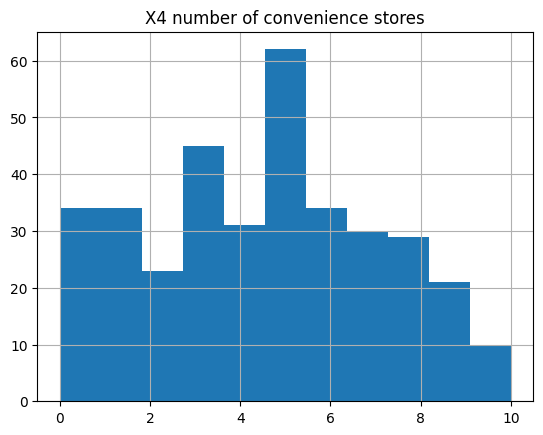

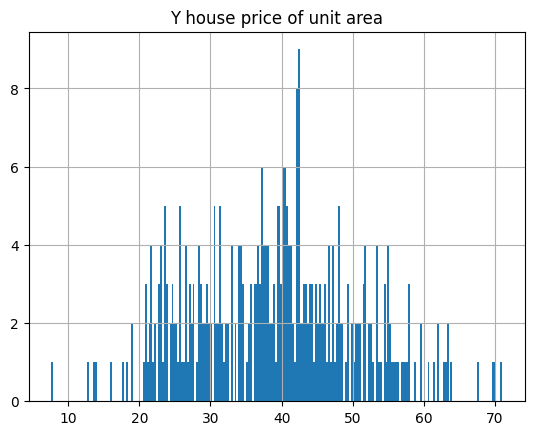

In [12]:
x2_bins = df[X2].value_counts().count()
x3_bins = df[X3].value_counts().count()
x4_bins = df[X4].value_counts().count()
Y_bins = df[Y].value_counts().count()

df.hist(column = [X2], bins= x2_bins)
df.hist(column = [X3], bins= x3_bins)
df.hist(column = [X4], bins= x4_bins)
df.hist(column = [Y], bins= Y_bins)

#### Числовые критерии проверки на нормальность: тесты Шапиро-Вилка, д'Агостино на K^2, Андерсона-Дарлинга

In [13]:
from scipy.stats import shapiro, normaltest, anderson

# Выборка данных для проверки
sample = X2
# Пороговый уровень для интерпретации результатов
alpha = 0.05

print('\nТест Шапиро-Вилка')
stat, p = shapiro(df[sample])
print('test statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация результатов
if p > alpha:
	print(f'Распределение выборки "{X2}" близко к нормальному')
else:
	print(f'Распределение выборки "{X2}" отличается от нормального')

print("\nТест д'Агостино на K^2")
stat, p = normaltest(df[sample])
print('test statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация результатов
if p > alpha:
	print(f'Распределение выборки "{X2}" близко к нормальному')
else:
	print(f'Распределение выборки "{X2}" отличается от нормального')

print("\nТест Андерсона-Дарлинга")
result = anderson(df[sample])
print('test statistics=%.3f' % result.statistic)
p = 0

# Интерпретация результатов
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, Распределение выборки близко к нормальному' % (sl, cv))
	else:
		print('%.3f: %.3f, Распределение выборки отличается от нормального' % (sl, cv))


Тест Шапиро-Вилка
test statistics=0.943, p=0.000
Распределение выборки "X2 house age" отличается от нормального

Тест д'Агостино на K^2
test statistics=65.935, p=0.000
Распределение выборки "X2 house age" отличается от нормального

Тест Андерсона-Дарлинга
test statistics=6.711
15.000: 0.570, Распределение выборки отличается от нормального
10.000: 0.649, Распределение выборки отличается от нормального
5.000: 0.778, Распределение выборки отличается от нормального
2.500: 0.908, Распределение выборки отличается от нормального
1.000: 1.080, Распределение выборки отличается от нормального


Как видно из гистограмм распределения и числовых показетелей выше - распределение данных не соответствует нормальному.  
Исходя из этого, правильнее будет применять алгоритмы Нормализации для скалирования данных

### Скалирование данных
Скалирование данных может выполнятся как Нормализация (изменение диапазонов данных без изменения формы распределения) или как Стандартизация (приведение к нормальному распределению)  
Метод Стандартизации требует, чтобы распределение исходных данных могло быть аппроксимировано гауссовым (нормальным) распределением, иначе эффект стандартизации будет плохим.

#### Нормализация данных с использованием максимального абсолютного масштабирования

In [14]:
abs_max_df = df.copy(deep=True)

for col in abs_max_df[[X2,X3,X4,Y]].columns:
    abs_max_df[col] = abs_max_df[col]/ abs_max_df[col].abs().max()

abs_max_df.head(5)
#abs_max_df.hist(column = [X2,X3,X4], bins=50)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
113,114,2013.333333,0.337900,0.127468,0.6,24.96172,121.53812,0.107042
330,331,2013.083333,0.730594,0.374948,0.0,24.94935,121.53046,0.180282
55,56,2012.833333,0.723744,0.376197,0.0,24.94968,121.53009,0.192958
251,252,2012.916667,0.723744,0.375815,0.0,24.94960,121.53018,0.194366
93,94,2012.916667,0.728311,0.371561,0.0,24.94920,121.53076,0.226761


#### Нормализация данных с использованием MinMax масштабирования
(так же можно использовать sklearn.preprocessing.MinMaxScaler)

In [15]:
min_max_df = df.copy(deep=True)

for col in min_max_df[[X2,X3,X4,Y]].columns:
    min_max_df[col] = (min_max_df[col] - min_max_df[col].min()) / (min_max_df[col].max() - min_max_df[col].min())

min_max_df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
113,114,2013.333333,0.337900,0.120805,0.6,24.96172,121.53812,0.000000
330,331,2013.083333,0.730594,0.370174,0.0,24.94935,121.53046,0.082019
55,56,2012.833333,0.723744,0.371433,0.0,24.94968,121.53009,0.096215
251,252,2012.916667,0.723744,0.371048,0.0,24.94960,121.53018,0.097792
93,94,2012.916667,0.728311,0.366762,0.0,24.94920,121.53076,0.134069


#### Нормализация данных с использованием метода Z-оценки (Стандартизация)
(так же можно использовать sklearn.preprocessing.StandartScaler)

In [16]:
z_mean_df = df.copy(deep=True)

for col in z_mean_df[[X2,X3,X4,Y]].columns:
    z_mean_df[col] = (z_mean_df[col] - z_mean_df[col].mean()) / z_mean_df[col].std()

z_mean_df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
113,114,2013.333333,-0.269609,-0.528714,0.544174,24.96172,121.53812,-2.746950
330,331,2013.083333,1.204066,0.600563,-1.614180,24.94935,121.53046,-2.292615
55,56,2012.833333,1.178363,0.606264,-1.614180,24.94968,121.53009,-2.213980
251,252,2012.916667,1.178363,0.604522,-1.614180,24.94960,121.53018,-2.205243
93,94,2012.916667,1.195498,0.585110,-1.614180,24.94920,121.53076,-2.004287


#### Нормализация данных с использованием метода Z-оценки, с заменой среднего значения на медиану

In [17]:
z_median_df = df.copy(deep=True)

for col in z_median_df[[X2,X3,X4,Y]].columns:
    z_median_df[col] = (z_median_df[col] - z_median_df[col].median()) / z_median_df[col].std()

z_median_df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
113,114,2013.333333,-0.111382,-0.116717,0.359726,24.96172,121.53812,-2.795908
330,331,2013.083333,1.362293,1.012559,-1.798629,24.94935,121.53046,-2.341573
55,56,2012.833333,1.336589,1.018261,-1.798629,24.94968,121.53009,-2.262938
251,252,2012.916667,1.336589,1.016519,-1.798629,24.94960,121.53018,-2.254201
93,94,2012.916667,1.353725,0.997106,-1.798629,24.94920,121.53076,-2.053245


### Построение матрицы корреляции признаков

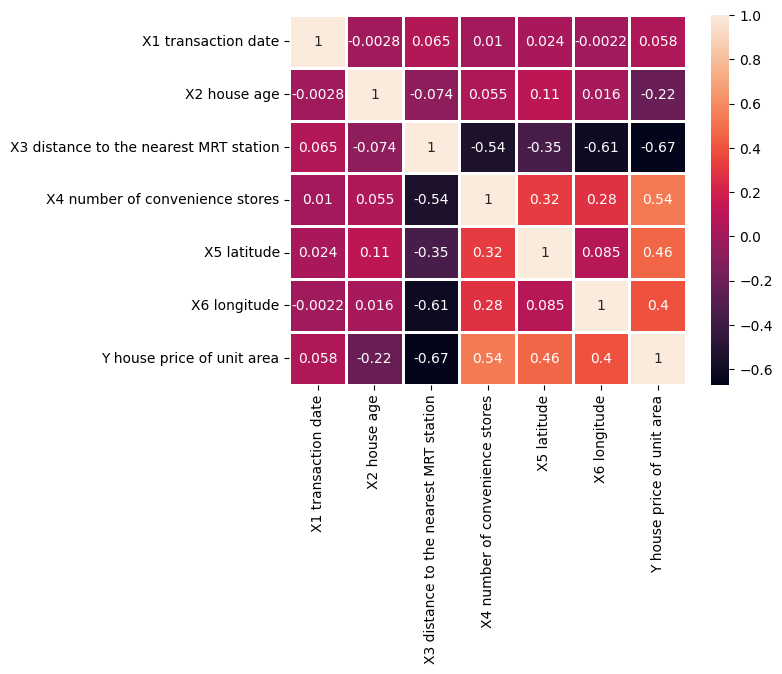

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn

# Используем нормализованные данные
df = z_mean_df

sn.heatmap(df[[X1,X2,X3,X4,X5,X6,Y]].corr(), annot=True, linewidths=1)
plt.show()

### Выводы:
На матрице корреляции выше можем наблюдать следущее:
- максимальное значение корреляции по модулю = 0,67, что указывает в целом на слабую корреляцию между признаками в данном наборе данных
- существует отрицательная корреляция (-0,54) между признаками X3 расстояния до метро и X4 количества магазинов в шаговой доступности,
- существует отрицательная корреляции (-0,67) между признаками X3 расстояния до метро и Y стоимости дома
- а так же положительная корреляция (+0,54) между признаками Y стоимости дама и X4 количества магазинов в шаговой доступности  
